# Correlated Brownian Motions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [7]:
def GeneratePathsCorrelatedBM(NoOfPaths, NoOfSteps, T, rho):
    Z1 = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    Z2 = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    
    W1 = np.zeros([NoOfPaths, NoOfSteps + 1])
    W2 = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    dt = T/float(NoOfSteps)
    time = np.zeros([NoOfSteps + 1])
    
    for i in range(0, NoOfSteps):
        # Making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z1[:, i] = (Z1[:, i] - np.mean(Z1[:, i]))/np.std(Z1[:,i])
            Z2[:, i] = (Z2[:, i] - np.mean(Z2[:, i]))/np.std(Z2[:,i])
        
        # Correlate noises
        Z2[:, i] = rho*Z1[:, i] + np.sqrt(1 - rho**2)*Z2[:, i]
        
        # Brownian motion W(t+1) = W(t) + dW(t)
        W1[:, i+1] = W1[:, i] + np.power(dt, 0.5)*Z1[:, i]
        W2[:, i+1] = W2[:, i] + np.power(dt, 0.5)*Z2[:, i]
        
        time[i+1] = time[i] + dt
        
    # Store the results
    paths = {"time" : time, "W1":W1, "W2":W2}
    
    return paths
        

In [8]:
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1 # 1 year
    
    ###### Negative correlation ######
    rho = -0.7
    Paths = GeneratePathsCorrelatedBM(NoOfPaths, NoOfSteps, T, rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(W1))
    plt.plot(timeGrid, np.transpose(W2))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
    
     ###### Positive correlation ######
    rho = 0.7
    Paths = GeneratePathsCorrelatedBM(NoOfPaths, NoOfSteps, T, rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(W1))
    plt.plot(timeGrid, np.transpose(W2))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
    
    ###### Zero correlation ######
    rho = 0
    Paths = GeneratePathsCorrelatedBM(NoOfPaths, NoOfSteps, T, rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(3)
    plt.plot(timeGrid, np.transpose(W1))
    plt.plot(timeGrid, np.transpose(W2))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")

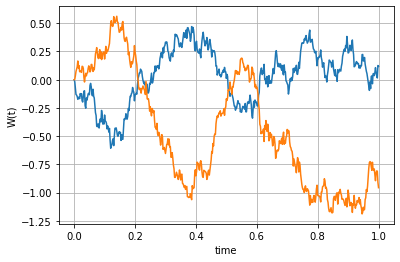

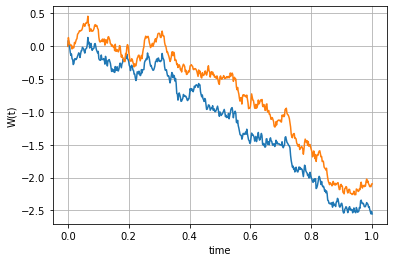

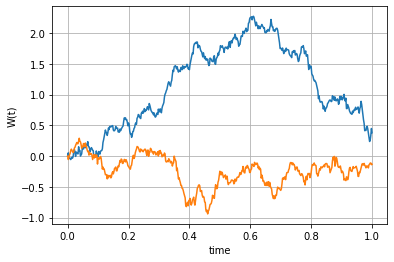

In [9]:
mainCalculation()